<a href="https://colab.research.google.com/github/Shweta2003/ML_journey-begins/blob/main/feature-scaling-Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('Social_Network_Ads.csv')

In [19]:
df = df.iloc[:,2:]

In [20]:
df.sample(5)

,Age,EstimatedSalary,Purchased
137,30,107000,1
304,40,60000,0
216,49,65000,0
293,37,77000,0
188,35,72000,0


Train test split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)

Standard Scalar - library for standardization

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
# calculate the mean and standard deviation in above step

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
scaler.mean_
# first is mean of age, second is mean of salary

array([3.78642857e+01, 6.98071429e+04])

In [24]:
# the scaled result are in the form of numpy arrays
# do convert it back to dataframes, we use following code :
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [25]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [26]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


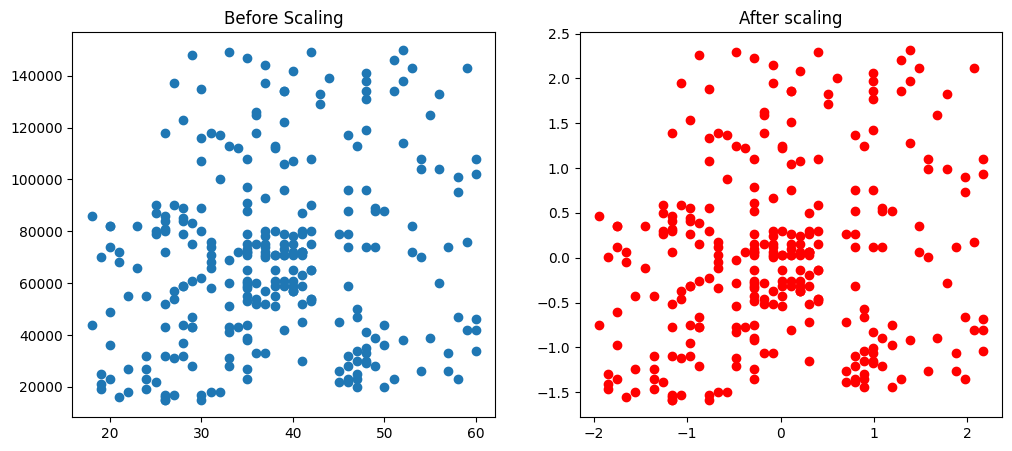

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After scaling")
plt.show()

## It is very important to provide scaled data during logistic regression

## no effect of scaling in decision tree

## no effect on outliers; outliers still remain outliers after standardization